In [46]:
# https://github.com/astropy/astropy-workshop/blob/main/02b-OOP/intro_to_oop.ipynb
#april 25

import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from glob import glob
from itertools import cycle

In [62]:
#nachi tova e object oriented programming (OOP), ideyata e che e polezno za golemi masivi danni

#tova e definirane na obekta (the first O in OOP) - v sluchaya LightCurves
class LightCurve: #tova e imeto na obekta
    def __init__(self, times=None, fluxes=None, uncertainties=None, flags=None, name = None): #nalyavo imame definirane na promenlivi, nadolu e obosobyavane kato atributi
        self.times = times
        self.fluxes = fluxes
        self.uncertainties = uncertainties
        self.flags = flags
        self.name = name

    def plot(self, color=None):#, linestyle=None, linewidth=None, label=None, ax=None):
        """ Plot the light curve""" #dokumentaciya kakvo pravi funkciyata, very good to do that!!!
        plt.errorbar(self.times, self.fluxes, self.uncertainties, self.uncertainties, fmt = '.',
                    color = color)#, linestyle = linestyle,label=self.name, linewidth = linewidth)
        #plt.xlabel('Time [days]')
        #plt.ylabel('Flux [erg]')
        #plt.legend() #inside the object, call to such things using their attributes

    @classmethod
    def from_txt(cls, path):
        data = np.loadtxt(path)

        times = data[0, :]
        fluxes = data[1,:]
        uncertainties = data[2, :]
        flags = data[3,:]

        return cls(times=times, fluxes=fluxes,
                   uncertainties=uncertainties,flags=flags)
    def clean(self, order=1):
        poly_params = np.polyfit(self.times,self.fluxes,order)
        best_fit_model = np.polyval(poly_params, self.times)

        self.fluxes /= best_fit_model
        self.uncertainties /= best_fit_model

        self.cleaned = True
        

In [49]:
path= "sample_lcs/lc_0.txt"
lc0 = LightCurve.from_txt(path)
n1 = lc0.name
lc0.plot(label = n1)

TypeError: LightCurve.plot() got an unexpected keyword argument 'label'

8.170911222552467
10.885649980898766
9.43464392405788
9.865443260890583
8.872362113089789
10.249886942659327
9.83788251799782
9.289340565820426
10.43324321052551
11.029288465282104


True

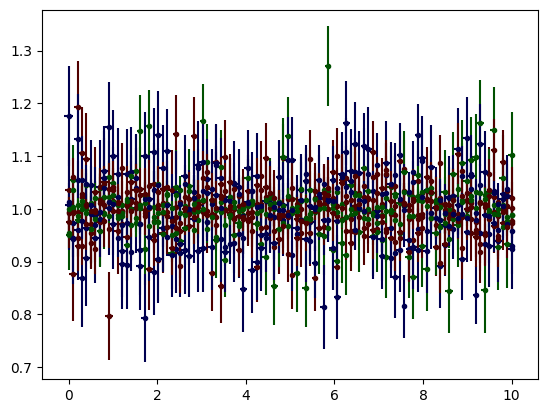

In [64]:
lc_paths = glob('sample_lcs/*.txt')
lightcurves = [LightCurve.from_txt(path) for path in lc_paths]
c = cycle (["#500000", "#005000", "#000050"])

for lightcurve in lightcurves:
    print(lightcurve.fluxes.mean())
    lightcurve.clean()
    lightcurve.plot(next(c))

lightcurves[0].cleaned

/tmp/ipykernel_4744/2166845181.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend() #inside the object, call to such things using their attributes


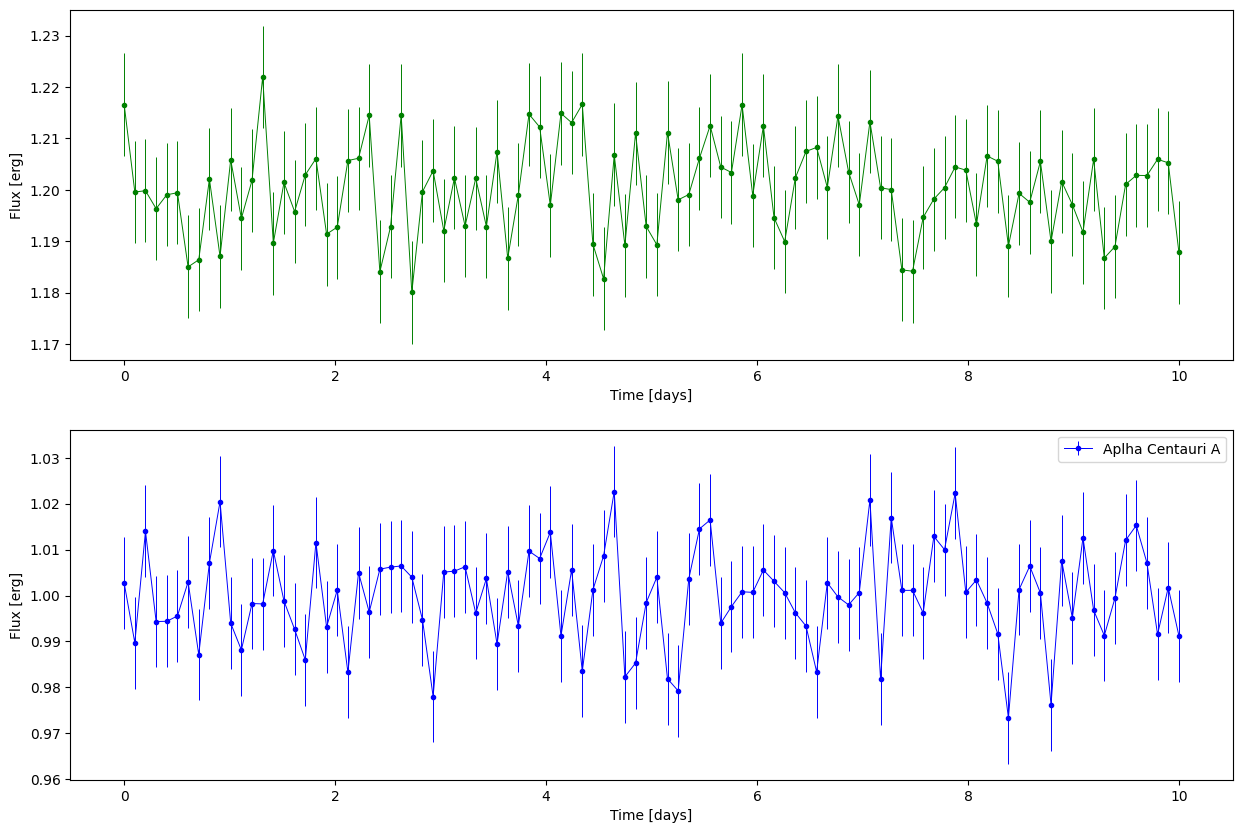

In [20]:
        
times = np.linspace(0, 10, 100) #Tova e Fake Data, ideyata e da pokazhem kak raboti definiraniyat po-gore obekt, bez da teglim typo kolichestvo data)
sigma = 0.01
fluxes = 1.2 + sigma * np.random.randn(len(times))
uncertainties = sigma * np.ones_like(len(fluxes))
flags = np.random.randint(0, 5, len(fluxes))
name = 'Proxima Centauri'

times2 = np.linspace(0, 10, 100) #Tova e Fake Data, ideyata e da pokazhem kak raboti definiraniyat po-gore obekt, bez da teglim typo kolichestvo data)
sigma2 = 0.015
fluxes2 = 1 + sigma * np.random.randn(len(times))
uncertainties2 = sigma * np.ones_like(len(fluxes))
flags2 = np.random.randint(0, 5, len(fluxes))
name2 = 'Aplha Centauri A'


prox_cen = LightCurve(times = times, fluxes = fluxes, 
                      uncertainties = uncertainties, flags = flags, 
                      name = name)
cen_a = LightCurve(times = times2, fluxes = fluxes2, 
                      uncertainties = uncertainties2, flags = flags2, 
                      name = name2)
#prox_cen.times #this will show u a table with all the times of the "measurements"
fig = plt.figure(figsize=(15,10))
ax1 = plt.subplot(211)
ax2 = plt.subplot(212)
prox_cen.plot('green', '-', 0.7, name, ax1)
cen_a.plot('b', '-', 0.7, name2, ax2)